# Introduction

A Riemannian manifold is a pair $(M, g)$, where $M$ is a smooth manifold, and $g$ is a choice of Riemannian metric on $M$. This metric constitutes a symmetric bilinear form $g: T_p M \times T_p M \rightarrow \mathbb{R}$, allowing for computation of the inner product on the tangent space. Given a point $p \in M$ and vectors $v, w \in T_p M$, we define the inner product as 

$$
\langle v, w \rangle_g = g_p(v, w) = g_{ij} v^i w^j.
$$

We first consider the case of embedded submanifolds. Suppose $(\tilde{M}, \tilde{g})$ is a Riemannian manifold, and $M \subseteq \tilde{M}$ is an embedded manifold. Given a smooth immersion $\iota: M \hookrightarrow \tilde{M}$, the metric $g = \iota^\ast g$ is reffered to as the metric induced by $\iota$, where $\iota^\ast$ is the pullback. If $(M, g)$ is a Riemannian submanifold of $(\tilde{M}, \tilde{g})$, then for every $p \in M$ and $v, w \in T_p M$, the induced metric is defined as

$$
g_p(v, w) = (\iota^\ast \tilde{g})_p (v, w) = \tilde{g}_{\iota(p)} (d\iota_p(v), d\iota_p(w)).
$$

In this example, we show how we can produce such an induced metric and use it to compute quantities of interest on the manifold.

## Defining the Manifold

We first define our function transformation, $\iota: M \rightarrow \mathbb{R}^3$ and build the manifold.

In [1]:
import riemax as rx

fn_transformation = rx.fn_transformations.fn_peaks
manifold = rx.Manifold.from_fn_transformation(fn_transformation)

Our newly created manifold allows us to compute quantities of interest on the manifold. We first define a point $p \in M$, and vectors $v, w \in T_p M$

In [2]:
from riemax.manifold.types import M, TpM, Rn

import jax
import jax.numpy as jnp


# defining a point p on the manifold
p: M[jax.Array] = jnp.array([0.0, 0.0])

# defining vectors at p
v: TpM[jax.Array] = jnp.array([1.0, 0.0])
w: TpM[jax.Array] = jnp.array([0.0, 1.0])

Now, we can compute our quantities of interest

In [3]:
metric_at_p = manifold.metric_tensor(p)
christoffel_symbols_at_p = manifold.sk_christoffel(p)

inner_product = manifold.inner_product(p, v, w)

## Showcasing the Magnification Factor

We can visualise something like the magnification factor across the domain. First, we produce the grid on which we wish to compute the magnification factor

In [4]:
import typing as tp

def produce_coordinate_grid(fn: tp.Callable[[M[jax.Array]], Rn[jax.Array]], n_points: int) -> Rn[jax.Array]:

    _x = jnp.linspace(-3.0, 3.0, n_points)
    grid = jnp.stack(jnp.meshgrid(_x, _x), axis=-1)
    
    return jax.vmap(jax.vmap(fn))(grid)

coordinate_grid = produce_coordinate_grid(fn_transformation, n_points=100)

Next, we compute the magnification factor at each point in the domain

In [5]:
magnification_factor = jax.vmap(jax.vmap(manifold.magnification_factor))(coordinate_grid[..., :2])

Finally, we produce a plot to demonstrate the computed values

(-3.0, 3.0)

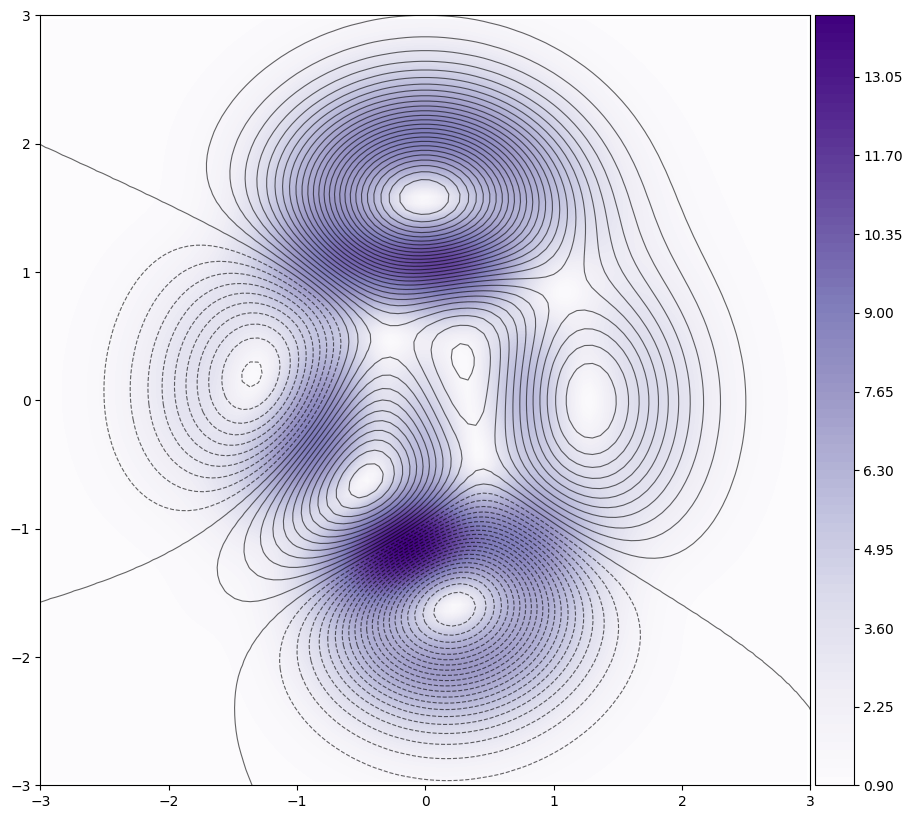

In [6]:
from matplotlib import cm, colors
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

fig = plt.figure(figsize=(12, 10))
ax = fig.gca()

plt_kwargs = dict(origin='lower', extent=(-3.0, 3.0, -3.0, 3.0))

# plot the geometry of the surface
ax.contour(*coordinate_grid.T, levels=50, alpha=0.6, colors='k', linewidths=0.8, **plt_kwargs)

# plot the magnification factor at each point
im = ax.contourf(magnification_factor, levels=100, cmap=cm.Purples, **plt_kwargs)

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im, cax=cax)

# configure plot
ax.set_aspect('equal')

ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)